<a href="https://colab.research.google.com/github/hoangxtr/form_detection/blob/master/text_orientation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

plt.rcParams["figure.figsize"] = (10,10)

In [ ]:
def rotate_image(image, angle):
  ''' Rotate image with angle
  Param:
    image: image need to rotate
    angle in degree
  Return:
    Rotated image
  '''
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

def rotate_form(origin_img):
  ''' Rotate arbitrary form to horizontal of text
  Param: 
    origin_img: form need to be rotated
  Return: rotated form
  '''
  
  h,w, _ = origin_img.shape
  img = origin_img[int(0.2*h):int(0.8*h), int(0.2*w):int(0.8*w)]
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # canny = cv2.Canny(img, 100, 200)
  sobel = cv2.Sobel(gray, cv2.CV_16S, 0,1)
  sobel = sobel.clip(min=0,max=255).astype('uint8')
  _, threshold_sobel = cv2.threshold(sobel, 150, 255, cv2.THRESH_BINARY)
  dilate = cv2.dilate(threshold_sobel, np.ones((3,3)), iterations=5)
  lines = cv2.HoughLinesP(dilate, 1, np.pi/180, 50, minLineLength=w/10)
  lines = np.squeeze(lines)
  slopes = np.arctan2(lines[:, 3]-lines[:, 1], lines[:,2]-lines[:,0])*180/np.pi
  clusters = []

  for slope in slopes:
    added = False
    for cluster in clusters:
      if np.abs( np.mean(cluster) - slope ) <= 2:
        cluster.append(slope)
        added = True
        break
    if not added:
      clusters.append([slope])
  angle = np.mean(clusters[np.argmax(list(map(lambda x: len(x), clusters)))])
  print(angle)
  if np.abs(angle) > 1.5:
    print('rotated')
    return rotate_image(origin_img, angle)
  return origin_img

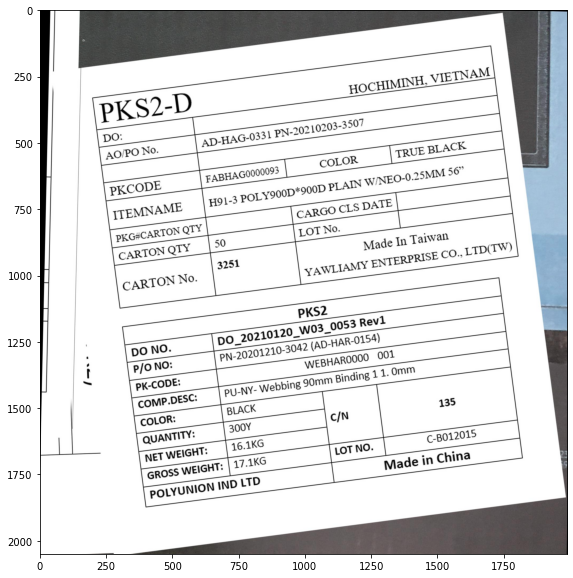

-7.53499107595475
rotated


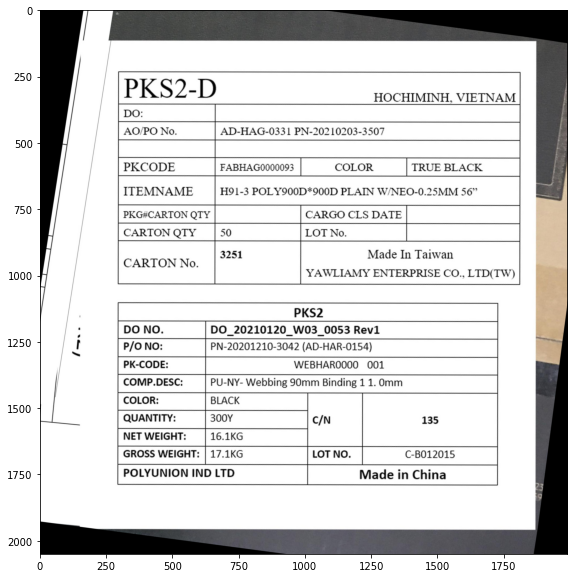

In [ ]:
img = cv2.imread('temp1.jpg')

plt.imshow(img)
plt.show()

plt.imshow(rotate_form(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)))
plt.show()

### Explained step

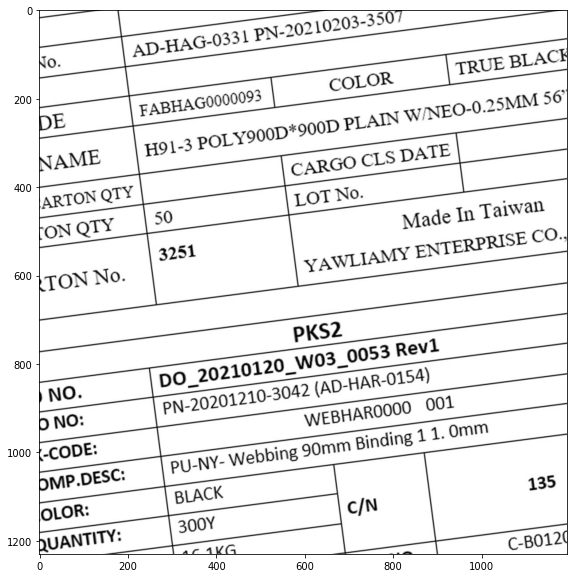

In [ ]:
img = cv2.imread('temp1.jpg')
origin_img = img.copy()
h,w = img.shape[:2]
img = img[int(0.2*h):int(0.8*h), int(0.2*w):int(0.8*w)]
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

Text(0.5, 1.0, 'dilate')

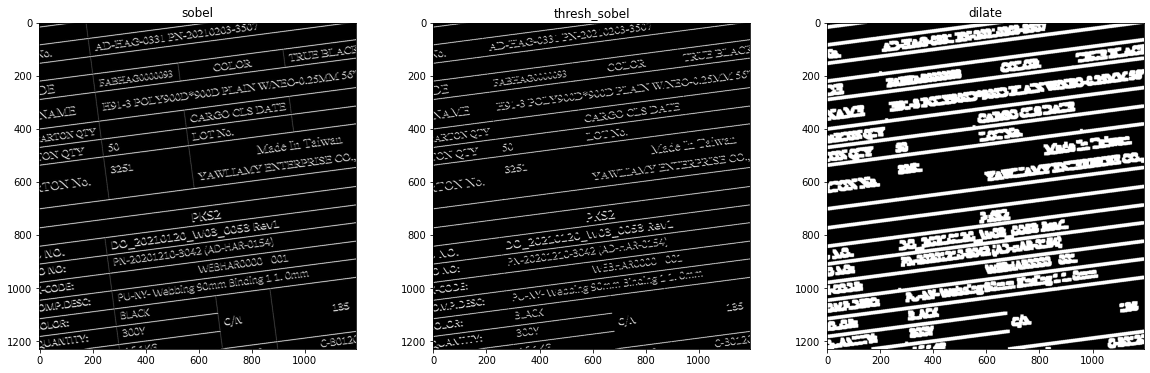

In [ ]:
sobel = cv2.Sobel(gray, cv2.CV_16S, 0,1)
sobel = sobel.clip(min=0,max=255).astype('uint8')
_, threshold_sobel = cv2.threshold(sobel, 150, 255, cv2.THRESH_BINARY)
dilate = cv2.dilate(threshold_sobel, np.ones((3,3)), iterations=5)

fig, ax = plt.subplots(1,3)
fig.set_size_inches((20,6))

ax[0].imshow(sobel, cmap='gray')
ax[0].set_title('sobel')

ax[1].imshow(threshold_sobel, cmap='gray')
ax[1].set_title('thresh_sobel')

ax[2].imshow(dilate, cmap='gray')
ax[2].set_title('dilate')

In [ ]:
lines = cv2.HoughLinesP(dilate, 1, 1*np.pi/180, 20, minLineLength=w/10)
lines = np.squeeze(lines)
print(lines.shape)
slopes = np.arctan2(lines[:, 3]-lines[:, 1], lines[:,2]-lines[:,0])*180/np.pi

(232, 4)


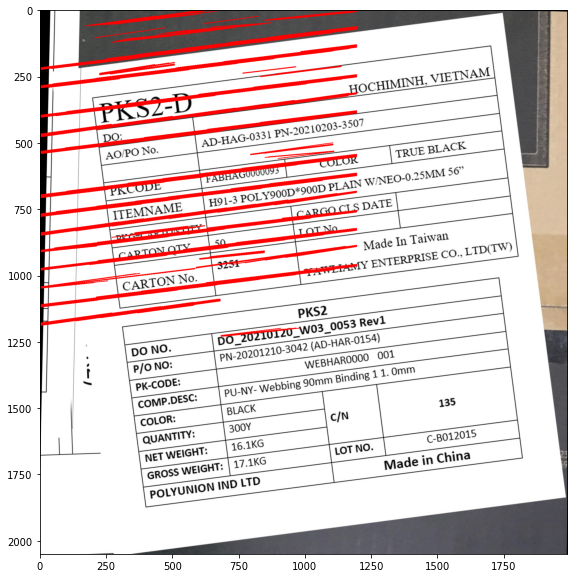

In [ ]:
ret_img = origin_img.copy()
for i in range(len(lines)):
    x1 = lines[i][0]
    y1 = lines[i][1]    
    x2 = lines[i][2]
    y2 = lines[i][3]    
    ret_img = cv2.line(ret_img,(x1,y1),(x2,y2),(0,0,255),2)

plt.imshow(cv2.cvtColor(ret_img, cv2.COLOR_BGR2RGB))

In [ ]:
clusters = []

for slope in slopes:
  added = False
  for cluster in clusters:
    if np.abs( np.mean(cluster) - slope ) <= 2:
      cluster.append(slope)
      added = True
      break
  if not added:
    clusters.append([slope])

In [ ]:
angle = np.median(clusters[np.argmax(list(map(lambda x: len(x), clusters)))])
angle

-6.982990332391206

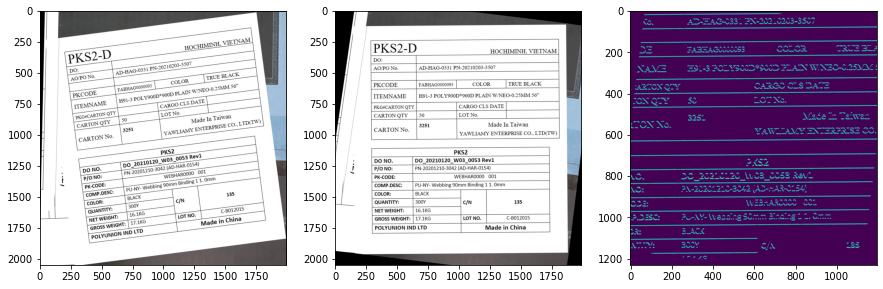

In [ ]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches((15,5))
ax[0].imshow(origin_img)
ax[1].imshow(rotate_image(origin_img, angle))
ax[2].imshow(rotate_image(threshold_sobel, angle))